In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["target"])['target']
X, y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

In [3]:
def preprocess(df):
    df = df.copy(deep=True)
    df = pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)
    return df

X = preprocess(X)

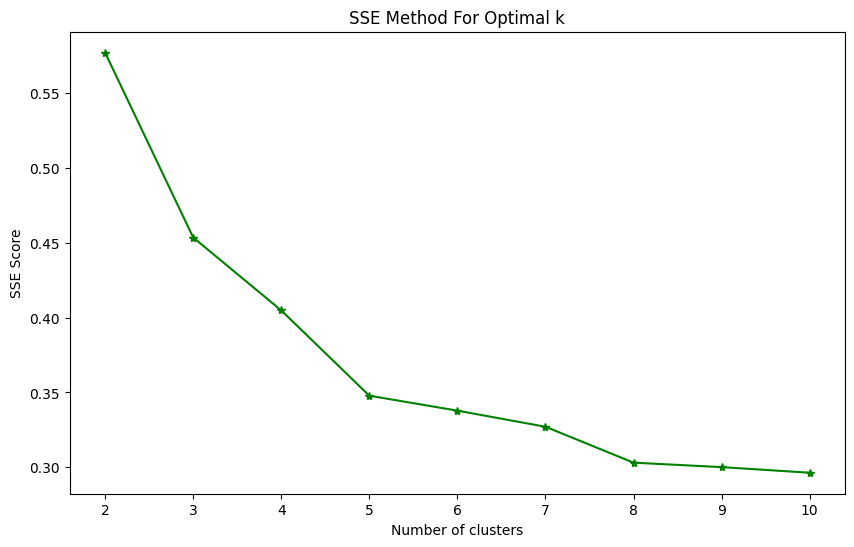

In [5]:
def calculate_sillhouette(points, kmax):
  sse = []
  for k in range(2, kmax+1):
    birch = Birch(n_clusters=k, compute_labels=True).fit(points)
    sse.append(silhouette_score(points, birch.labels_))
  return sse


plt.figure(figsize=(10,6))
plt.plot(range(2, 11), calculate_sillhouette(X, 10), 'g*-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE Score')
plt.title('SSE Method For Optimal k')
plt.show()

In [9]:
birch = Birch(n_clusters=2 , compute_labels=True).fit(X)
birch.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

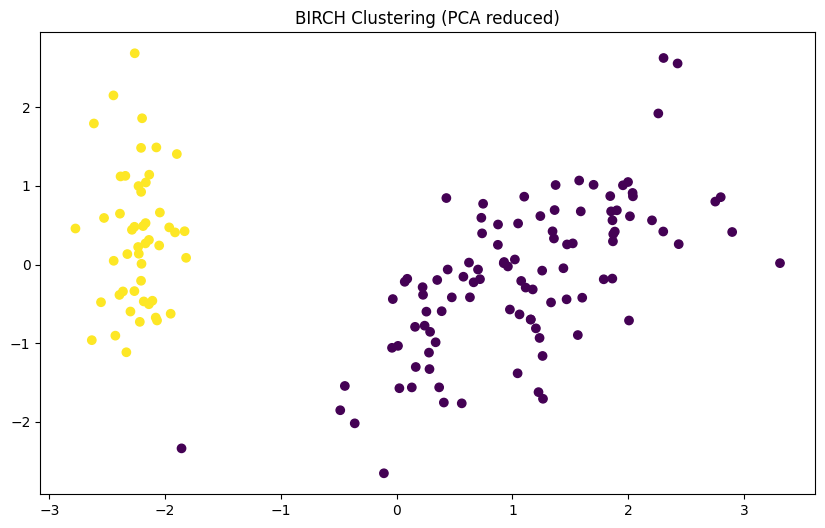

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=birch.labels_)

plt.title('BIRCH Clustering (PCA reduced)')
plt.show()

In [11]:
# Internal measures
print("Silhouette_score: ", silhouette_score(X, birch.labels_))
print("Calinski_Harabasz_score", calinski_harabasz_score(X, birch.labels_))
print("Davies_Bouldin_score", davies_bouldin_score(X, birch.labels_))

# External measures
print("Adjusted_Rand_score", adjusted_rand_score(np.array(y), birch.labels_))
print("Normalized_Mutual_Info_score", normalized_mutual_info_score(np.array(y), birch.labels_))
print("Homogeneity_Completeness_V_Measure", homogeneity_completeness_v_measure(np.array(y), birch.labels_))

Silhouette_score:  0.5770346019475988
Calinski_Harabasz_score 240.24566522437965
Davies_Bouldin_score 0.5916560992933364
Adjusted_Rand_score 0.5437515388376617
Normalized_Mutual_Info_score 0.6924541904553437
Homogeneity_Completeness_V_Measure (0.5453362851117876, 0.9482746528494937, 0.6924541904553438)
